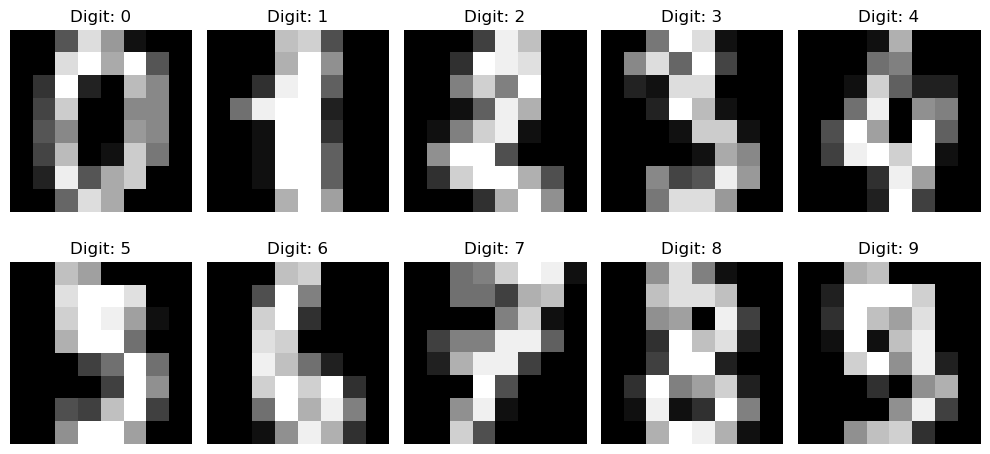

Digits dataset: 1797 samples, 64 features


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.datasets import load_digits


# For deep learning
import tensorflow as tf
from tensorflow import keras
from keras import layers, Input, Sequential
from tensorflow.keras.optimizers import Adam, SGD


# For PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F


# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)


# Load Digits dataset for classification
digits = load_digits()
X_digits = digits.data
y_digits = digits.target




# Display sample digits
plt.figure(figsize=(10, 5))
for i in range(10):
   plt.subplot(2, 5, i+1)
   plt.imshow(digits.images[i], cmap='gray')
   plt.title(f'Digit: {digits.target[i]}')
   plt.axis('off')
plt.tight_layout()
plt.show()


# Print information about dataset
print(f"Digits dataset: {X_digits.shape[0]} samples, {X_digits.shape[1]} features")

In [2]:
# Normalize pixel values to [0,1]
X_normalized = X_digits / 16.0

# Train-test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y_digits, test_size=0.2, random_state=42, stratify=y_digits)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [3]:
X_normalized

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [4]:
model = tf.keras.Sequential([
    Input(shape=(64,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4250 - loss: 2.0633 - val_accuracy: 0.8472 - val_loss: 1.2443
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.8650 - loss: 0.9982 - val_accuracy: 0.9222 - val_loss: 0.4654
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.9266 - loss: 0.4105 - val_accuracy: 0.9500 - val_loss: 0.2624
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.9404 - loss: 0.2504 - val_accuracy: 0.9611 - val_loss: 0.1912
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.9493 - loss: 0.1831 - val_accuracy: 0.9611 - val_loss: 0.1568
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.9656 - loss: 0.1455 - val_accuracy: 0.9639 - val_loss: 0.1356
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.9709 - loss: 0.1203 - val_accuracy: 0.9611 - val_loss: 0.1212
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.9798 - loss: 0.1020 - val_accuracy: 0.96

ReLU is common in most nnms and helps mitigate the vanishing gradient problem. The gradients flow better during backpropagation, allowing the model to adjust especially the inital layers.

Softmax will compute the probabilities for each class, exactly what we need.

In [5]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"TensorFlow test accuracy: {test_acc:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9753 - loss: 0.0805
TensorFlow test accuracy: 0.9806


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step


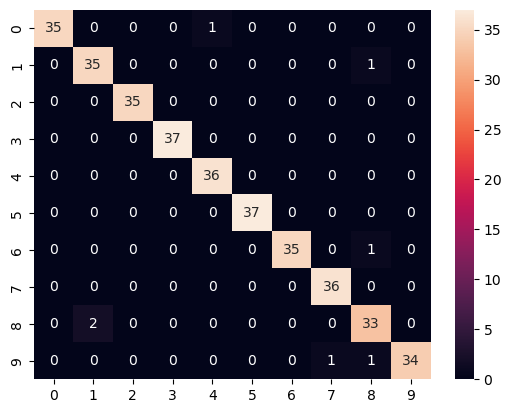

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.92      0.94      0.93        35
           9       1.00      0.94      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [8]:
predictions = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

print(classification_report(y_test, predictions))

strong recognition across most classes, some difficulty with 1 and 8.

In [9]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(64, 128)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(128, 64)  # First to second hidden layer
        self.fc3 = nn.Linear(64, 10)   # Second hidden layer to output (10 classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # ReLU activation after first layer
        x = F.relu(self.fc2(x))  # ReLU activation after second layer
        x = self.fc3(x)          # Output logits (no softmax here)
        return x

In [10]:
mlp_model = SimpleMLP()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

train_ds = TensorDataset(X_train_tensor, y_train_tensor)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32)

epochs = 20
for epoch in range(epochs):
    mlp_model.train()
    running_loss = 0.0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = mlp_model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(train_loader):.4f}")

# Evaluation
mlp_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_x, batch_y in test_loader:
        outputs = mlp_model(batch_x)
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

print(f"PyTorch test accuracy: {correct/total:.4f}")

Epoch 1/20 - Loss: 2.1021
Epoch 2/20 - Loss: 1.1489
Epoch 3/20 - Loss: 0.5284
Epoch 4/20 - Loss: 0.3370
Epoch 5/20 - Loss: 0.2505
Epoch 6/20 - Loss: 0.2025
Epoch 7/20 - Loss: 0.1688
Epoch 8/20 - Loss: 0.1485
Epoch 9/20 - Loss: 0.1251
Epoch 10/20 - Loss: 0.1186
Epoch 11/20 - Loss: 0.1006
Epoch 12/20 - Loss: 0.0887
Epoch 13/20 - Loss: 0.0794
Epoch 14/20 - Loss: 0.0762
Epoch 15/20 - Loss: 0.0668
Epoch 16/20 - Loss: 0.0586
Epoch 17/20 - Loss: 0.0562
Epoch 18/20 - Loss: 0.0535
Epoch 19/20 - Loss: 0.0517
Epoch 20/20 - Loss: 0.0430
PyTorch test accuracy: 0.9583


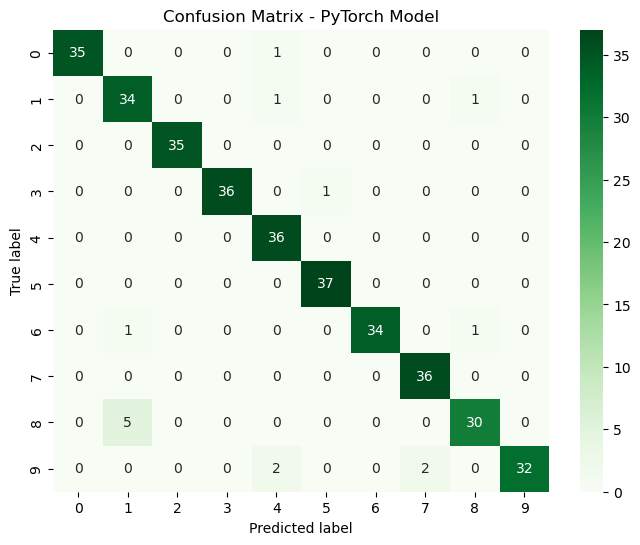

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.85      0.94      0.89        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       0.90      1.00      0.95        36
           5       0.97      1.00      0.99        37
           6       1.00      0.94      0.97        36
           7       0.95      1.00      0.97        36
           8       0.94      0.86      0.90        35
           9       1.00      0.89      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [11]:
mlp_model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        outputs = mlp_model(batch_x)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - PyTorch Model')
plt.show()

# Classification report
print(classification_report(all_labels, all_preds))

Model struggled with confusing 1 and 8 with each other, particularly when the true digit was 8 the model guesses one a lot. Otherwise strong accuracy.

In [12]:
def build_model(activation='relu', optimizer='adam', learning_rate=0.001, dropout_rate=0.0, extra_layer=False):
    model = Sequential()
    model.add(layers.Input(shape=(64,)))
    model.add(layers.Dense(256, activation=activation))
    if dropout_rate > 0:
        model.add(layers.Dropout(dropout_rate))
    if extra_layer:
        model.add(layers.Dense(64, activation=activation))
    model.add(layers.Dense(64, activation=activation))
    if dropout_rate > 0:
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(10, activation='softmax'))
    
    if optimizer.lower() == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer.lower() == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    else:
        opt = Adam(learning_rate=learning_rate)  # default
    
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

#tanh activation, SGD optimizer, dropout 0.2, extra layer added
custom_model = build_model(activation='tanh', optimizer='sgd', learning_rate=0.01, dropout_rate=0.2, extra_layer=True)

history = custom_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)]
)


Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1514 - loss: 2.3114 - val_accuracy: 0.4833 - val_loss: 1.9694
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.4344 - loss: 1.9120 - val_accuracy: 0.7111 - val_loss: 1.6453
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.6138 - loss: 1.6267 - val_accuracy: 0.7528 - val_loss: 1.3788
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.7062 - loss: 1.3723 - val_accuracy: 0.8139 - val_loss: 1.1663
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.7550 - loss: 1.1824 - val_accuracy: 0.8306 - val_loss: 1.0010
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.8093 - loss: 1.0215 - val_accuracy: 0.8500 - val_loss: 0.8723
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.8368 - loss: 0.8997 - val_accuracy: 0.8556 - val_loss: 0.7720
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.8499 - loss: 0.8151 - val_accuracy: 0.86

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.9430 - loss: 0.2557
Test accuracy: 0.9611
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


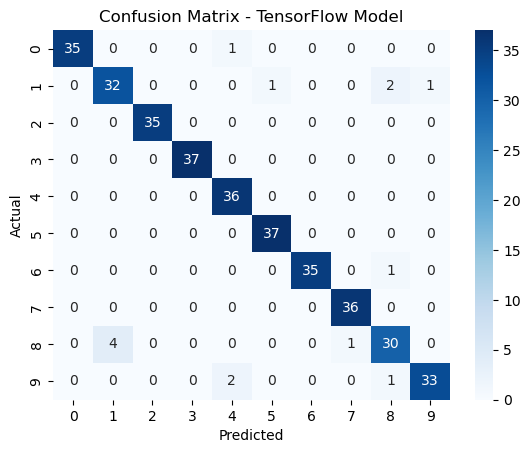

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.92      1.00      0.96        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.88      0.86      0.87        35
           9       0.97      0.92      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [13]:
# Evaluate on test data
test_loss, test_accuracy = custom_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Confusion matrix and report
predictions = custom_model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - TensorFlow Model')
plt.show()

print(classification_report(y_test, predictions))

Overall accuracy is 95% on the test set. Most digits have high precision and recall (above 0.9), so classification is strong across most.

Digits 1 and 8 show slightly lower recall (~83%), indicating the model sometimes misses these or confuses them with others.

In summary, first model proved most effective with 128, 64, 10 hidden layers using ReLU activation and softmax to predict class probabilities.